In [1]:
# for data analysis
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
from collections import Counter
import nltk

### Reading the data

In [2]:
data = pd.read_csv("mbti.csv") 
data

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

### Data description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
data.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [5]:
#All the personality types listed in the dataset
types = np.unique(np.array(data['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [17]:
#Total count of each personality type
total = data.groupby(['type']).count()*50
total

posts
type       
ENFJ   9500
ENFP  33750
ENTJ  11550
ENTP  34250
ESFJ   2100
ESFP   2400
ESTJ   1950
ESTP   4450
INFJ  73500
INFP  91600
INTJ  54550
INTP  65200
ISFJ   8300
ISFP  13550
ISTJ  10250
ISTP  16850

Text(0.5, 1.0, 'Total post each personality type')

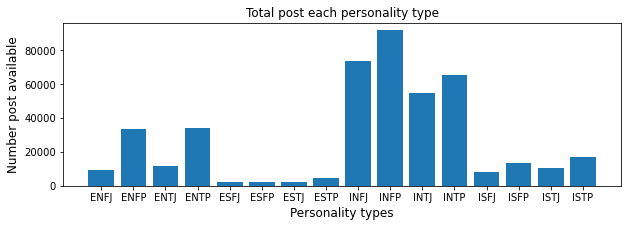

In [20]:
#plot count for all posts
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [7]:
df = total.reset_index()
df = df.rename(columns={'posts': 'count','type':'personality type'})
df

personality type  count
0              ENFJ    190
1              ENFP    675
2              ENTJ    231
3              ENTP    685
4              ESFJ     42
5              ESFP     48
6              ESTJ     39
7              ESTP     89
8              INFJ   1470
9              INFP   1832
10             INTJ   1091
11             INTP   1304
12             ISFJ    166
13             ISFP    271
14             ISTJ    205
15             ISTP    337

In [8]:
# Extract the personality types and their counts from the dataframe
personality_types = df['personality type']
counts = df['count']

## EDA

In [9]:
# creating a pie chart to visualize counts
new_df = pd.DataFrame({'PersonalityType': df['personality type'], 'Count': df['count']})

# Create an interactive pie chart using Plotly Express
fig = px.pie(new_df, values='Count', names='PersonalityType')

# Update the layout of the chart 
fig.update_layout(
    title='Personality Type Distribution',
    autosize=False,
    width=600,
    height=600
)

# Display the interactive chart
fig.show()

### WordCloud


In [10]:
#Finding the most common words in all posts.
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)


[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

### Creating the wordcloud

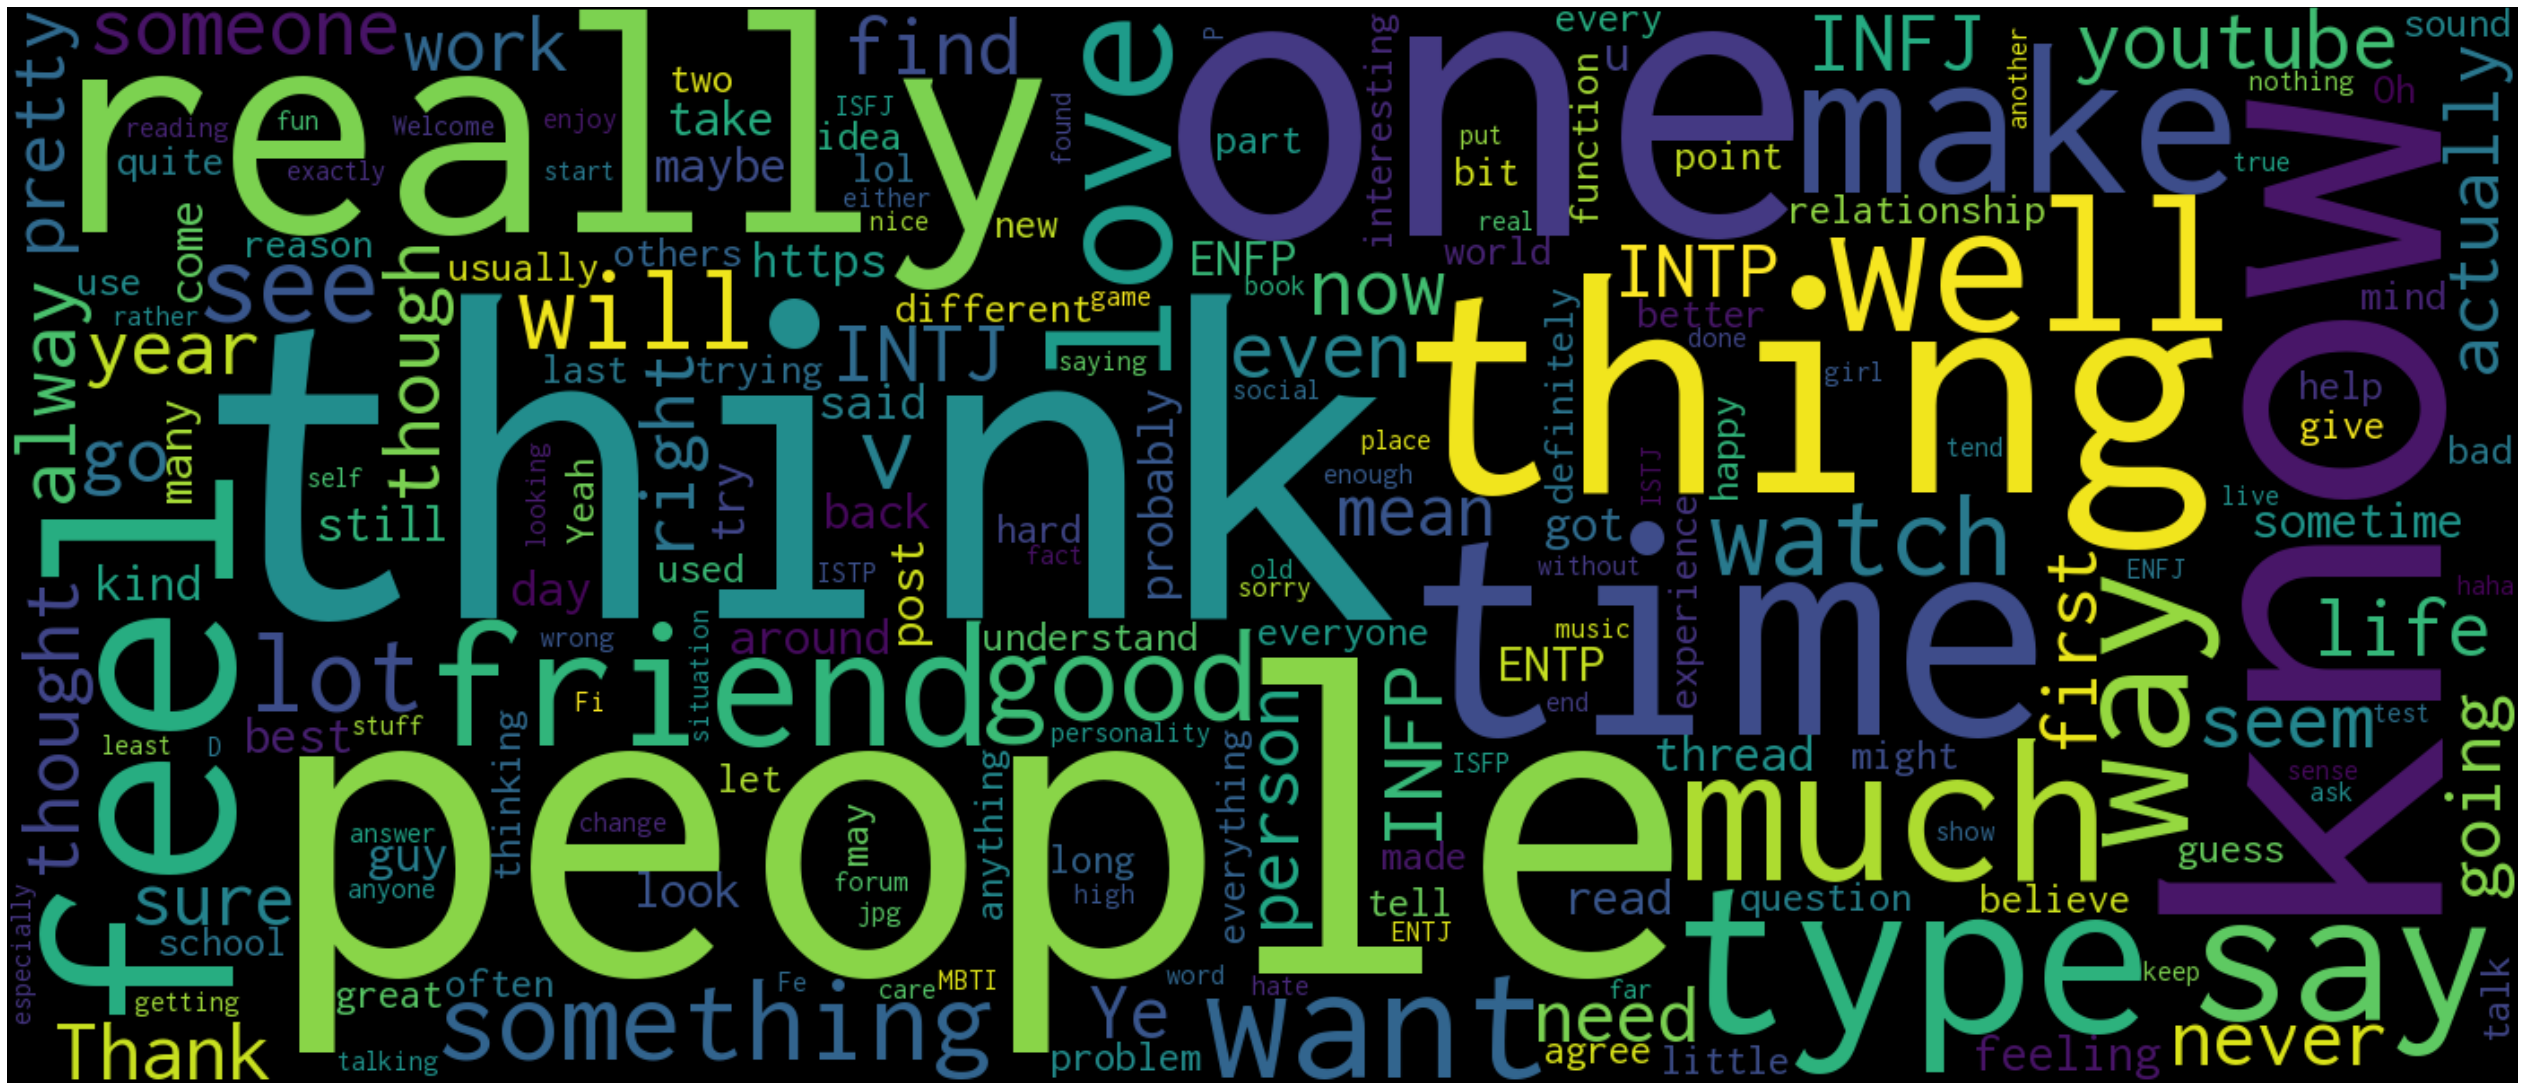

In [16]:
# path to the ttf font file 

font_path = "./inconsolata.ttf" 

# specifying attributes for the wordcloud
# to focus on individual words rather than combinations, setting collocations to False is appropriate
wc = WordCloud(width=1400, height=600, collocations=False, background_color="black", colormap="viridis", font_path=font_path).generate(" ".join(words))
plt.figure(figsize=(45,20))

# interpolation determines the algorithm used for image interpolation when displaying the word cloud
# bilinear helps to reduce pixelation and provides a more continuous appearance for the word cloud image
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### the posts contain some useless words The posts contain general words like : I, to, the, a, and, of, is, you etc.
# don't remove words like I, me, you, as they'll be useful for personality prediction
##### we need to assume that these words don't really provide any useful information to train the Machine Learning model as most of them are stop-words or other useless words

### Histogram plot for posts column

Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

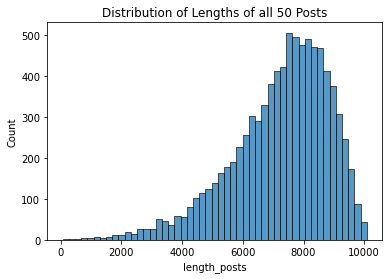

In [24]:
# creating a distance plot for checking distribution of lengths of all 50 posts in each row
data["length_posts"] = data["posts"].apply(len)
sns.histplot(data["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

##### We can see that most no of lengthly posts have between 7500-9000 words.